In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

In [5]:
df=pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])

In [61]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
885,0,39.0,29.1250
886,0,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(714, 3)

In [10]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [11]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [57]:
y_test.shape


(143,)

In [17]:
clf=DecisionTreeClassifier()

In [19]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [22]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6358763693270735

## Binning/Discritization

In [97]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [98]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
    
])

In [99]:
x_train_trf=trf.fit_transform(X_train)
x_test_trf=trf.transform(X_test)

In [100]:
trf.named_transformers_['first'].n_bins_

array([15])

In [101]:
trf.named_transformers_['second'].n_bins_

array([15])

In [102]:
trf.named_transformers_['first'].bin_edges_   #range for Age column

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [103]:

trf.named_transformers_['second'].bin_edges_  ##ranges for Fare column

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [104]:
output=pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':x_train_trf[:,1]
    
})

In [105]:
output['age_labels']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [106]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
642,2.0,0.0,27.9000,10.0,"(0.42, 6.0]","(26.55, 31.275]"
869,4.0,0.0,11.1333,5.0,"(0.42, 6.0]","(10.5, 13.0]"
764,16.0,2.0,7.7750,2.0,"(6.0, 16.0]","(7.25, 7.775]"
754,48.0,13.0,65.0000,12.0,"(47.0, 54.0]","(51.479, 76.292]"
345,24.0,5.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"


In [107]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)

y_pred2=clf.predict(x_test_trf)

In [108]:
accuracy_score(y_test,y_pred2)

## need to check bins if accuracy get low increase beens

0.6363636363636364

In [112]:
def descretize(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
    
       ])
    x_trf=trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title('after')
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title('after')
    
    plt.show()
    

0.6316705790297339


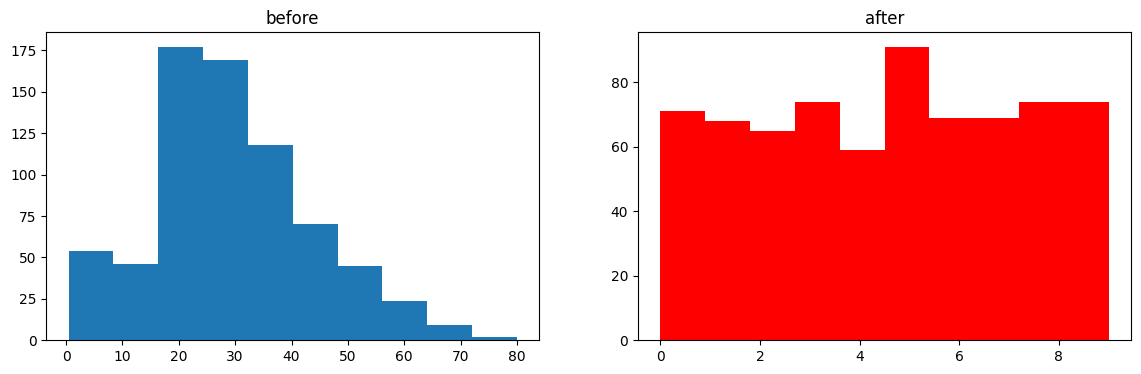

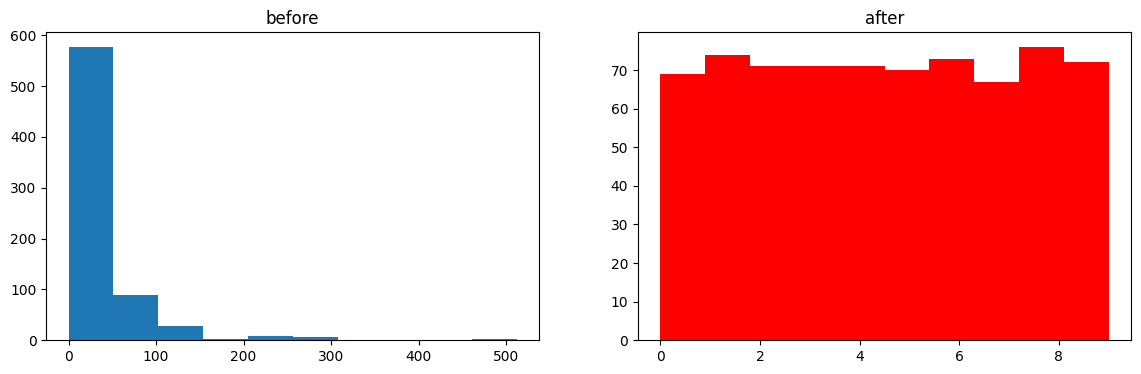

In [117]:
descretize(10,'quantile')

In [121]:
def descretize(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
    
       ])
    x_train_trf=trf.fit_transform(X_train)
    x_test_trf=trf.transform(X_test)
    clf=DecisionTreeClassifier()
    clf.fit(x_train_trf,y_train)

    y_pred2=clf.predict(x_test_trf)
    print(accuracy_score(y_test,y_pred2))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('before')
    
    plt.subplot(122)
    plt.hist(x_train_trf[:,0],color='red')
    plt.title('after')
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('before')
    
    plt.subplot(122)
    plt.hist(x_train_trf[:,1],color='red')
    plt.title('after')
    
    plt.show()
    

0.6363636363636364


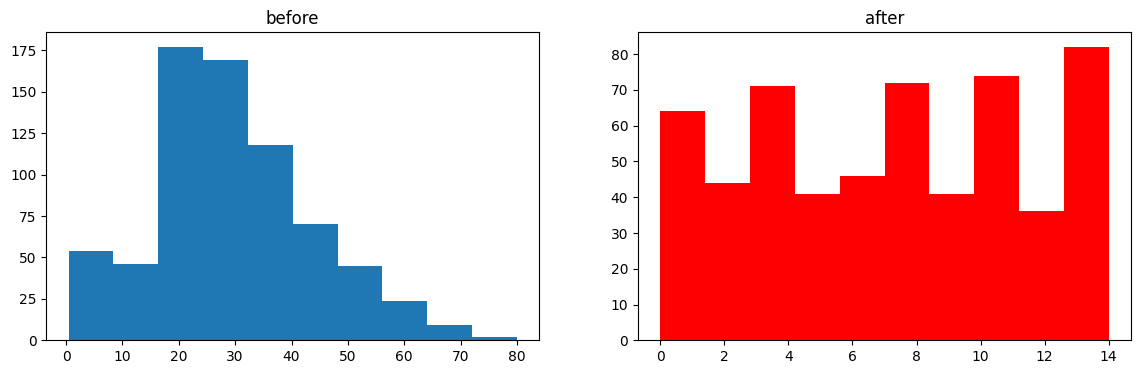

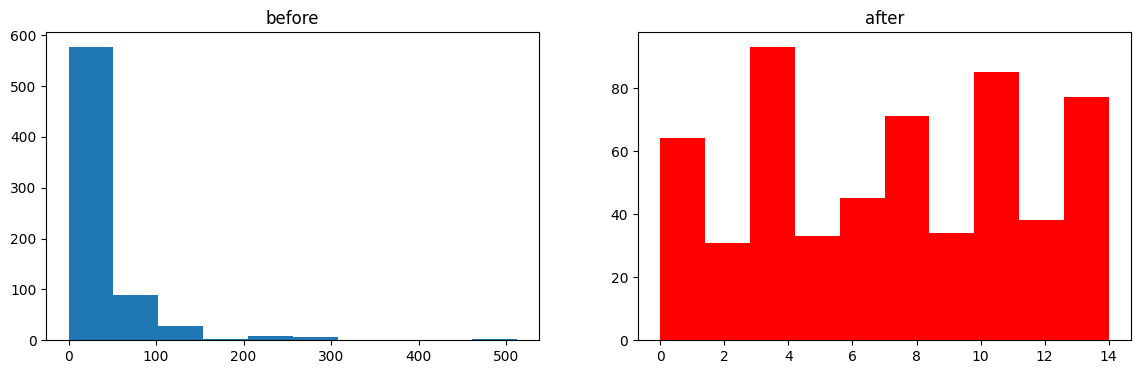

In [123]:
descretize(15,'quantile')